In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.shape

(768, 9)

In [4]:
df[df==0].count()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
df.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


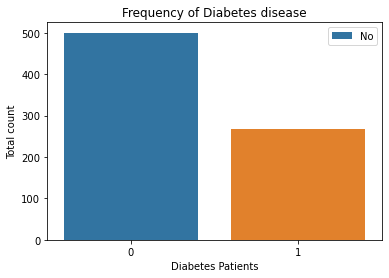

In [9]:
sns.countplot(x='Outcome',data=df)
plt.xlabel("Diabetes Patients")
plt.ylabel("Total count")
plt.title("Frequency of Diabetes disease")
plt.legend(['No','Yes'],loc='upper right')

In [10]:
from sklearn import linear_model,metrics
from sklearn.model_selection import train_test_split

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
x=df[['Age']]
y=df[['Glucose']]

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [14]:
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [15]:
x_train

,Age
41,37
755,37
622,45
577,21
190,21
...,...
702,52
604,36
151,37
418,27


In [16]:
x_test

,Age
730,34
416,22
2,32
226,26
34,45
...,...
327,37
272,40
525,21
443,33


In [17]:
y_pred=reg.predict(x_test)
y_pred

array([[121.35227243],
       [113.40974651],
       [120.02851811],
       [116.05725515],
       [128.63292118],
       [126.64728971],
       [115.39537799],
       [119.36664095],
       [145.17985018],
       [118.04288663],
       [129.29479834],
       [120.02851811],
       [120.69039527],
       [119.36664095],
       [114.07162367],
       [126.64728971],
       [116.05725515],
       [118.04288663],
       [123.99978107],
       [137.23732426],
       [114.73350083],
       [123.33790391],
       [114.73350083],
       [112.74786935],
       [122.01414959],
       [125.32353539],
       [113.40974651],
       [123.99978107],
       [124.66165823],
       [125.98541255],
       [140.54671006],
       [116.71913231],
       [117.38100947],
       [127.30916687],
       [112.74786935],
       [129.9566755 ],
       [135.25169278],
       [129.9566755 ],
       [115.39537799],
       [125.98541255],
       [118.04288663],
       [112.74786935],
       [114.73350083],
       [125

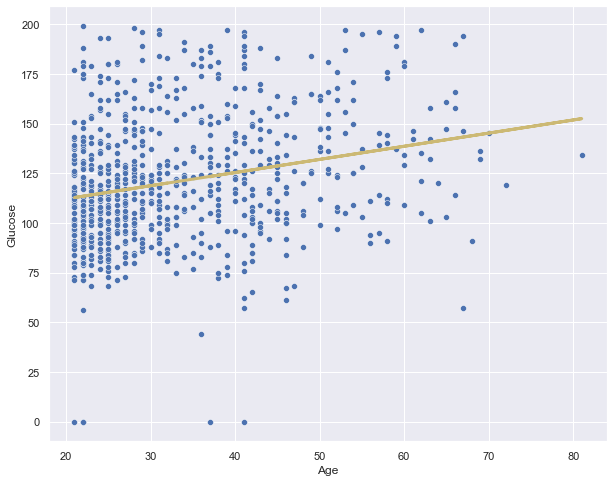

In [18]:
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(x='Age',y='Glucose',data=df)
plt.plot(x_train, reg.predict(x_train),color='y',linewidth=3)

In [19]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

23.212236752852224

In [20]:
metrics.mean_squared_error(y_test, y_pred)

903.5382860258014